In [1]:
import pandas as pd 
import numpy as np 
import random
from math import log, sqrt 
from statistics import mode, mean
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# for the parkinsons dataset .... 

In [3]:
# Original Dataset
parkinsons_data = pd.read_csv("datasets/parkinsons.csv")
parkinsons_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,Diagnosis
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [4]:
parkinsons_data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'Diagnosis'],
      dtype='object')

In [5]:
#returns a processed Dataframe for the Loan dataset
# *Notes* 
# left the 3+ in dependents and changed values to a string to handle this column as a catagorical attribute.
# Leaving the loan amount term as numerical, could be a categorical value if we assume these are the only terms the bank is 
# looking at
def load_data_parkinsons():
    parkinsons_data = pd.read_csv("datasets/parkinsons.csv")
    
    return parkinsons_data
parkinsons_data = load_data_parkinsons()
print(parkinsons_data)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [6]:
#information about each column
print(parkinsons_data.dtypes)
for col in parkinsons_data.columns:
    print(f"{col}: {parkinsons_data[col].unique()}")

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
Diagnosis             int64
dtype: object
MDVP:Fo(Hz): [119.992 122.4   116.682 116.676 116.014 120.552 120.267 107.332  95.73
  95.056  88.333  91.904 136.926 139.173 152.845 142.167 144.188 168.778
 153.046 156.405 153.848 153.88  167.93  173.917 163.656 104.4   171.041
 146.845 155.358 162.568 197.076 199.228 198.383 202.266 203.184 201.464
 177.876 176.17  180.198 187.733 186.1

In [7]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,Diagnosis
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [8]:
CATEGORICAL_COLS = []

BINARY_COLS = []

CLASS_LABEL = 'Diagnosis'

POSITIVE_CLASS = 1

NUMERICAL_COLS = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']

CATEGORICAL_COLS_DICT = {}

# {"WifeEducation":[1,2,3,4], 
#                          "HusbandEducation":[1,2,3,4], 
#                          "WifeReligion":[0,1], 
#                          "WifeWorking":[0,1],
#                          "HusbandOccupation":[1,2,3,4], 
#                          "LivingStandardIndex":[1,2,3,4] ,
#                          "MediaExposure":[0,1]}

MAX_TREE_DEPTH = 4


In [9]:
def compute_information_gain(data, attributes, label_col_name, debug=False):
    best_attribute = None 
    best_info_gain = None 
    best_attrs_value_len = None
    best_attributes_attribute_value = []
    # base information gain 
    total_rows = len(data)
    unique_labels = data[label_col_name].unique()
    
    #calculate the base information gain for calculation later on 

    base_info_gain = 0
    overall_label_probs = [] 
    for label in unique_labels:
        overall_label_prob = len(data[data[label_col_name]==label])/ total_rows 
        base_info_gain = base_info_gain - overall_label_prob*log(overall_label_prob,2)
        overall_label_probs.append(overall_label_prob)
    
    #iterate through given attributes in this case 
    for attribute in attributes:
        attribute_values = data[attribute].unique() # need to find the unique values for the attribute 
        attribute_entropies = []
        attribute_lengths = [] 
        # We need to observe where this attribute is 0, 1, and 2 to calculate the entropy 
        # and for each do the calculations where the target class is 0 and 1 
        
        if attribute in CATEGORICAL_COLS:        
            for attribute_value in attribute_values: 
                total_attribute_type = len(data[data[attribute]==attribute_value])
                if total_attribute_type == 0:
                    attribute_type_entropy = 0 
                else:
                    attribute_type_entropy = 0 

                    for label in unique_labels:
                        attr_label_prob = len(data[(data[attribute]==attribute_value)&(data[label_col_name]==label)])/total_attribute_type
                        if attr_label_prob != 0:
                            attribute_type_entropy = attribute_type_entropy - attr_label_prob*log(attr_label_prob,2)
                attribute_entropies.append(attribute_type_entropy)
                attribute_lengths.append(total_attribute_type)
        else: # this means that it is numeric 

            # either the attribute value is greater than or less than the average 
            attr_avg = mean(data[attribute])
            attribute_values = ["greater_than" ,"less_than"]
            for attribute_value in attribute_values:
                if attribute_value == "greater_than":
                    total_attribute_type = len(data[data[attribute]>attr_avg])
                else:
                    total_attribute_type = len(data[data[attribute]<=attr_avg])
                if total_attribute_type == 0:
                    attribute_type_entropy = 0 
                else:
                    attribute_type_entropy = 0 

                    for label in unique_labels:
                        if attribute_value == "greater_than":
                            # error here 
                            attr_label_prob = len(data[(data[attribute]>attr_avg)&(data[label_col_name]==label)])/total_attribute_type
                        else: 
                            attr_label_prob = len(data[(data[attribute]<=attr_avg)&(data[label_col_name]==label)])/total_attribute_type
                        
                        if attr_label_prob != 0:
                            attribute_type_entropy = attribute_type_entropy - attr_label_prob*log(attr_label_prob,2)
                attribute_entropies.append(attribute_type_entropy)
                attribute_lengths.append(total_attribute_type)

            
       
        #use all the calculations above to produce the total entropy and the information gain 
        total_entropy = 0
        for i in range(len(attribute_values)):
            total_entropy = total_entropy + (attribute_lengths[i]/ total_rows * attribute_entropies[i])
        gain = base_info_gain - total_entropy

        # storing the attribute if it is the attribute with the best information gain 
        if not best_info_gain:
            best_info_gain = gain 
            best_attribute = attribute
            best_attrs_value_len = len(attribute_values) if len(attribute_values) < 10 else 2 
            best_attributes_attribute_value = attribute_values
        else: 
            if best_info_gain < gain:
                best_info_gain = gain 
                best_attribute = attribute
                best_attrs_value_len = len(attribute_values) if len(attribute_values) < 10 else 2 
                best_attributes_attribute_value = attribute_values
        
    return best_info_gain, best_attribute, list(best_attributes_attribute_value)

In [10]:
class root():
    def __init__(self, label_col_name, data) -> None:
        self.train_data = data 
        self.child_nodes = []
        self.best_attribute = None
        self.label_col_name = label_col_name

        self.train_decision_tree()

    def train_decision_tree(self):
        # finding the inital attribute to split on 
        attributes = [col for col in self.train_data.columns if col != self.label_col_name]
        unique_class_labels = self.train_data[self.label_col_name].unique()
        majority_class = None
        max_class_frequency = 0 
        for label in unique_class_labels: 
            class_frequency = len(self.train_data[self.train_data[self.label_col_name] == label])
            if majority_class == None:
                majority_class = label 
                max_class_frequency = class_frequency
            else: 
                if max_class_frequency < class_frequency:
                    max_class_frequency = class_frequency
                    majority_class = label 

        # compute the best attribute using information gain 
        # choose a random set of attributes 
        num_attrs = int(sqrt(len(attributes)))
        attrs_to_use = random.choices(attributes, k=num_attrs)
        _, best_attribute, attribute_values = compute_information_gain(self.train_data, attrs_to_use, self.label_col_name)

        # split the dataset based on the attribute values (0,1,2) and create three child nodes 
        depth = 1 
        initial_child_nodes = [] 

        if best_attribute in CATEGORICAL_COLS:
            attribute_values = CATEGORICAL_COLS_DICT[best_attribute]
            for r in attribute_values: 
                child_node = Node(self.label_col_name, self.train_data[self.train_data[best_attribute]==r], best_attribute, r, attributes, majority_class, depth)
                initial_child_nodes.append(child_node)
        else:
            attr_avg = mean(self.train_data[best_attribute])
            child_node_one = Node(self.label_col_name, self.train_data[self.train_data[best_attribute]>attr_avg], best_attribute, attr_avg, attributes, majority_class, depth, greater_than=True)
            child_node_two = Node(self.label_col_name, self.train_data[self.train_data[best_attribute]<=attr_avg], best_attribute, attr_avg, attributes, majority_class, depth, greater_than=False)
            initial_child_nodes = [child_node_one,child_node_two]
        
        self.child_nodes = initial_child_nodes
        self.best_attribute = best_attribute

    def find_class(self, row, node, depth):
        # iterate/ search decision tree to fin the desired target class 
        depth = depth+1
        # termination case
        if node.is_leaf_node:
            return node.target_class
        else: 
            #child_attribute_value to select next attribute
            attr = node.child_nodes[0].my_attribute
            
            #selecting the next branch 
            row_attr_val = row[attr]
            next_node = None
            if attr in CATEGORICAL_COLS: 
                for child in node.child_nodes:
                    if row_attr_val == child.my_attribute_value:
                        next_node = child
            else: 
                child_attr_val = node.child_nodes[0].my_attribute_value
                if row_attr_val> child_attr_val:
                    for child in node.child_nodes:
                        if child.greater_than:
                            next_node = child
                else: 
                    for child in node.child_nodes:
                        if not child.greater_than:
                            next_node = child
            if next_node == None:
                x ="Sad"
            return self.find_class(row, next_node, depth)




    def run_experiment_decision_tree(self, data):
        count = 0 
        predictions = [] 
        for index, row in data.iterrows():
            next_node = None 
            row_attr_val = row[self.best_attribute]

            if self.best_attribute in CATEGORICAL_COLS:
                for child in self.child_nodes:
                    if row_attr_val == child.my_attribute_value:
                        next_node = child
            else:
                child_attr_val = self.child_nodes[0].my_attribute_value
                if row_attr_val> child_attr_val:
                    for child in self.child_nodes:
                        if child.greater_than:
                            next_node = child
                else:
                    for child in self.child_nodes:
                        if not child.greater_than:
                            next_node = child
            # error here 
            if next_node == None:
                x= "Sad"
            final_class = self.find_class(row, next_node, 1)
            if final_class == row[self.label_col_name]:
                count = count + 1
            predictions.append(final_class)
        return count/len(data), predictions


In [11]:
class Node():
    def __init__(self, label_col_name,  data, my_attribute, attribute_value, attributes, my_parent_majority_class, depth,  greater_than = None):
        # storing the data, attribute and attribute value on which this node was created on and the 
        # remaining attributes 
        self.my_data = data 
        self.my_attribute = my_attribute
        self.my_attribute_value = attribute_value
        self.my_attributes = attributes 
        self.depth = depth + 1 
        self.label_col_name = label_col_name
        self.greater_than = greater_than
        # only for the instance the data is empty, should become the target class 
        self.my_parent_majority_class = my_parent_majority_class 
        
        #these will be set thoughout the remaining logic 
        self.is_leaf_node = False 
        self.child_nodes = None 
        self.target_class = None
        
        
        total_data_instance = len(data)
        # TODO fix this from hardcoding
        # target_class_zero_len = len(data[data["class"]==0])
        # target_class_one_len = len(data[data["class"]==1])
        
        unique_class_labels = data[self.label_col_name].unique()
        majority_class = None
        max_class_frequency = 0 
        for label in unique_class_labels: 
            class_frequency = len(self.my_data[self.my_data[self.label_col_name] == label])
            if majority_class == None:
                majority_class = label 
                max_class_frequency = class_frequency
            else: 
                if max_class_frequency < class_frequency:
                    max_class_frequency = class_frequency
                    majority_class = label 

        # if there is no data then set the final target class as the parent majority class 
        # and then set the node as the leaf node 
        if total_data_instance == 0: 
            self.target_class = self.my_parent_majority_class
            self.is_leaf_node = True 
            
        else: 
            # if all the data belongs to target class 0 then set that as the final target class
            # and then the node as a leaf node 
            if total_data_instance == max_class_frequency:
                self.target_class = majority_class
                self.is_leaf_node = True 
            # there are no remaining attributes to split on so just set the target class to majority class in
            # the dataset
            elif len(attributes) ==0:
                # majority_class = 0 if target_class_zero_len> target_class_one_len else 1 
                self.target_class = majority_class
                self.is_leaf_node = True 
            elif self.depth == MAX_TREE_DEPTH:
                # majority_class = 0 if target_class_zero_len> target_class_one_len else 1 
                self.target_class = majority_class
                self.is_leaf_node = True 
            else:
                # find the majority target class (this will come in handy if there is an empty dataset for child node)
                #majority_class = 0 if target_class_zero_len> target_class_one_len else 1 

                # compute the best attribute using information gain 
                # choose a random set of attributes 
                num_attrs = int(sqrt(len(attributes)))
                attrs_to_use = random.choices(attributes, k=num_attrs)
                _, best_attribute, best_attributes_attribute_value = compute_information_gain(self.my_data, attrs_to_use, self.label_col_name)
                new_attrs = attributes
                # split the dataset base of the attribute values (0,1,2) and create three child nodes 
                child_nodes = [] 
                if best_attribute in CATEGORICAL_COLS:
                    attribute_values = CATEGORICAL_COLS_DICT[best_attribute]
                    # TODO: This is chard coded and may cause problems 
                    for r in attribute_values:
                        child_node = Node(self.label_col_name, data[data[best_attribute]==r], best_attribute, r, new_attrs, majority_class, self.depth)
                        child_nodes.append(child_node)
                else:
                    attr_avg = mean(data[best_attribute])
                    child_node_one = Node(self.label_col_name, data[data[best_attribute]>attr_avg], best_attribute, attr_avg, new_attrs, majority_class, self.depth, greater_than=True)
                    child_node_two = Node(self.label_col_name, data[data[best_attribute]<=attr_avg], best_attribute, attr_avg, new_attrs, majority_class, self.depth, greater_than=False)
                    child_nodes = [child_node_one,child_node_two]
                self.child_nodes = child_nodes
                #self.child_nodes = [child_node_zero, child_node_one, child_node_two]

In [12]:
class forest():
    def __init__(self, label_col_name, n_trees, chunks, valid_chunks) -> None:
        self.n_trees = n_trees
        self.chunks = chunks 
        self.trees = [] 
        self.valid_chunks = valid_chunks
        self.label_col_name = label_col_name
        # here we need to implement a bootstrapping algorithm where each tree needs to recieve a synthetic dataset 
        for i in range(self.n_trees):
            train_data = self.create_synthetic_dataset()
            # each tree needs to get a synthetic dataset 
            tree = root(self.label_col_name, train_data)
            self.trees.append(tree)

    def test(self, test_data):
        tree_predictions = []
        for tr in self.trees: 
            _, test_preds = tr.run_experiment_decision_tree(test_data)
            tree_predictions.append(test_preds)
        # find the majority vote for each prediction 
        majority_preds = [mode([preds[i] for preds in tree_predictions]) for i in range(len(test_data))]
        return majority_preds
    
    def create_synthetic_dataset(self):
        # pick some random chunks 
        random_pick = [random.choice(self.valid_chunks) for d in range(len(self.valid_chunks))]
        all_data = [self.chunks[val] for val in random_pick]
        all_data_concated = pd.concat(all_data)
        return all_data_concated


In [13]:
def plot_decision_tree_distribution(data, name=""):
    standard_deviation = np.std(data)
    standard_deviation_stringified = "{:1.4f}".format(standard_deviation)
    _ = plt.hist(data, bins= 30)
    title = name + " std =" + standard_deviation_stringified
    plt.title(title)
    plt.show()

In [14]:
def plot_forest_data(n_trees, data, dataset_name, metric):
    plt.scatter(n_trees, data)
    title = dataset_name + metric 
    plt.title(title)
    plt.xlabel("N Trees")
    plt.ylabel(metric)
    plt.show()

In [15]:
def create_stratified_training_chunks_loan(parkinsons_data):
    label_col = CLASS_LABEL
    
    class_zero_data =parkinsons_data[parkinsons_data[label_col] == 0 ]
    class_one_data = parkinsons_data[parkinsons_data[label_col] == 1 ]
#     class_two_data = loan_data[loan_data[label_col] == 3 ]


    chunks = {} 
    total_k = 10
    class_zero_chunk_len = int(round(len(class_zero_data)/ total_k))
    class_one_chunk_len = int(round(len(class_one_data)/ total_k))
#     class_two_chunk_len = int(round(len(class_two_data)/ total_k))

    for k in range(total_k):
        if k < total_k -1:
            class_zero_chunk = class_zero_data[k*class_zero_chunk_len:(k+1)*class_zero_chunk_len]
            class_one_chunk = class_one_data[k*class_one_chunk_len:(k+1)*class_one_chunk_len]
#             class_two_chunk = class_two_data[k*class_two_chunk_len:(k+1)*class_two_chunk_len]
            chunks[k] = pd.concat([class_zero_chunk,class_one_chunk])
            
            
        else:
            class_zero_chunk = class_zero_data[k*class_zero_chunk_len:]
            class_one_chunk = class_one_data[k*class_one_chunk_len:]
#             class_two_chunk = class_one_data[k*class_two_chunk_len:]
            chunks[k] = pd.concat([class_zero_chunk,class_one_chunk])
    return chunks, label_col, parkinsons_data

In [16]:
def get_tp_fp_tn_fn(test_set_actuals, preds, positive_class):
    # may need to alter this to just be one class, 'Y' in this case...
    TP = 0
    FN = 0
    FP = 0
    TN = 0 
    for i in range(len(test_set_actuals)):
        if test_set_actuals[i] == positive_class:
            if preds[i] == positive_class:
                TP = TP + 1 
            else: 
                FN = FN + 1 
        else:
            if preds[i] == positive_class:
                FP = FP + 1 
            else: 
                TN = TN + 1 
    
    confusion_matrix={"TruePositive": TP,"TrueNegative":TN,
                     "FalsePositive":FP,"FalseNegative":FN}
    
    recall = TP/(TP + FN) if (TP + FN) != 0 else 0 
    precision = TP/(TP + FP) if (TP + FP) != 0 else 0 
    f1_score = 2 * precision*recall/(precision + recall) if (precision + recall) != 0 else 0
    accuracy = (TP + TN)/ (TP+FP+TN+FN)
    return recall, precision, f1_score, confusion_matrix

In [19]:
def print_statistics(confusion_matrix):
    print(confusion_matrix)
#     accuracy
    totalPredictions = sum(confusion_matrix.values())
    accuracy = (confusion_matrix["TruePositive"]+confusion_matrix["TrueNegative"]) / totalPredictions  
#     precision
    if(confusion_matrix["TruePositive"]+confusion_matrix["FalsePositive"]) == 0:
        precision = 0
    else:
        precision = confusion_matrix["TruePositive"] / (confusion_matrix["TruePositive"]+confusion_matrix["FalsePositive"])
#     Recall  
    recall = confusion_matrix["TruePositive"] / (confusion_matrix["TruePositive"] + confusion_matrix["FalseNegative"])
    
#     print("Accuracy: ",accuracy)
#     print("Precision: ",precision)
#     print("Recall: ", recall)
    print("True Positive: ", confusion_matrix["TruePositive"],"False Negative: ", confusion_matrix["FalseNegative"])
    print("False Positive: ",confusion_matrix["FalsePositive"],"True Negative",confusion_matrix["TrueNegative"])

k:  0
k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


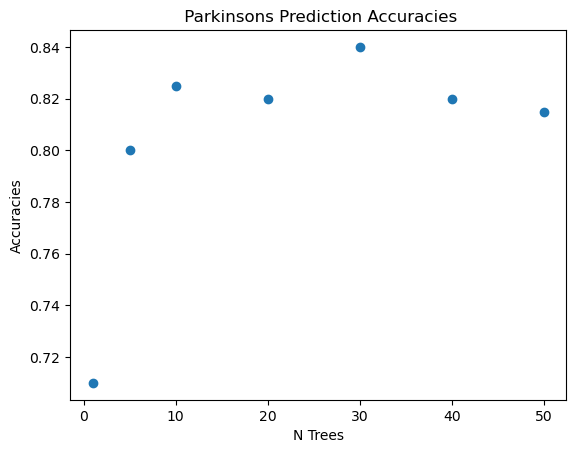

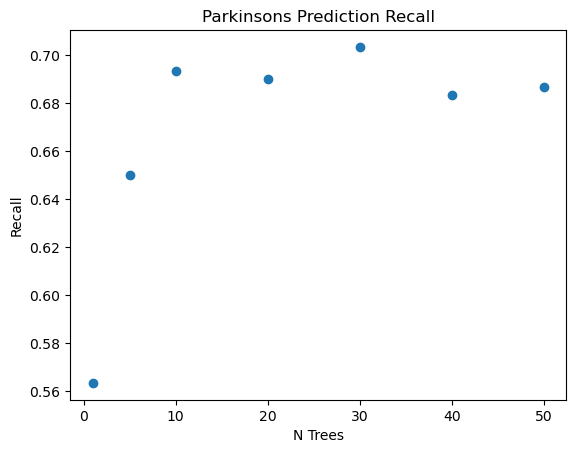

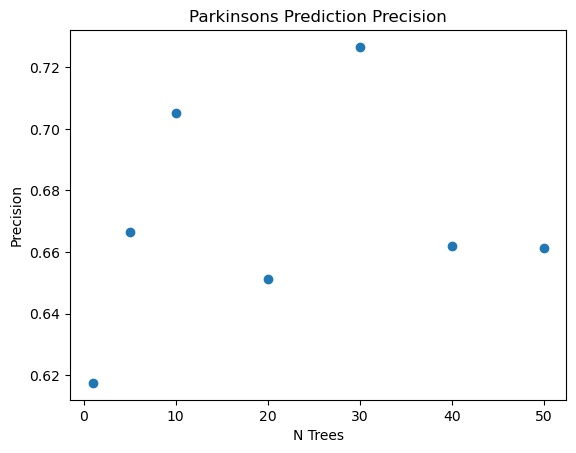

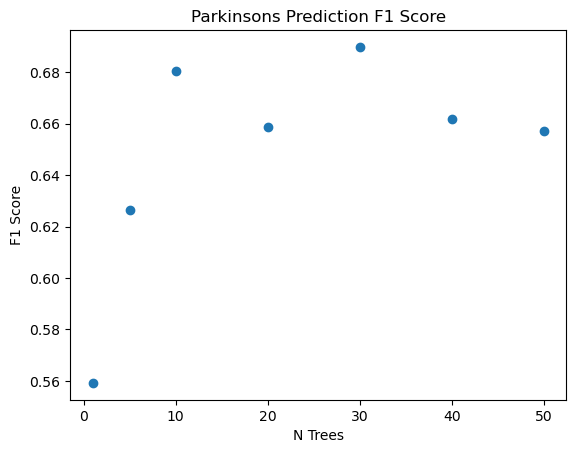

Results:
--------
          True Positive  True Negative  False Positive False Negative 
1         12.40          1.40           3.40           2.30           
5         13.80          1.80           3.00           0.90           
10        13.90          2.20           2.60           0.80           
20        13.80          2.20           2.60           0.90           
30        14.20          2.20           2.60           0.50           
40        13.90          2.10           2.70           0.80           
50        13.70          2.20           2.60           1.00           
Parkinsons Prediction Accuracies
{1: 0.71, 5: 0.8, 10: 0.825, 20: 0.82, 30: 0.84, 40: 0.82, 50: 0.815}
Parkinsons Prediction Recall
{1: 0.5633333333333334, 5: 0.65, 10: 0.6933333333333334, 20: 0.69, 30: 0.7033333333333334, 40: 0.6833333333333333, 50: 0.6866666666666666}
Parkinsons Prediction Precision
{1: 0.6174879506458454, 5: 0.6663771456012169, 10: 0.705094599243206, 20: 0.6512362637362638, 30: 0.72660253575

In [48]:
def run_parkinsons():
    total_k = 10
    chunks, label,  _ = create_stratified_training_chunks_loan(parkinsons_data)
    n_trees_to_run = [1, 5, 10, 20, 30, 40, 50]
#     n_trees_to_run = [1,2,3]
    unique_label_classes  = [0, 1]
#     confusion_matrix = {}

    n_tree_dict_accuracy = {n:[] for n in n_trees_to_run}
    n_tree_dict_recall = {n:[] for n in n_trees_to_run}
    n_tree_dict_precision= {n:[] for n in n_trees_to_run}
    n_tree_dict_f1_score = {n:[] for n in n_trees_to_run}
    n_tree_dict_confusion_matrices = {}
    
    for k in range(total_k):
        print("k: ",k)
        to_choose_from = [c for c in range(total_k) if c != k ]
        test_set = chunks[k]
        # send to forest 
        
        temp_confusion = {}

        for n_tree in n_trees_to_run:
            rf = forest(label, n_tree, chunks, to_choose_from)
            preds = rf.test(test_set)
            test_set_actuals = list(test_set[label])
            count = 0 
            for i in range(len(test_set)):
                if test_set_actuals[i] == preds[i]:
                    count = count + 1 
            testing_accuracy = count/len(test_set)
            temp_recalls = []
            temp_precisions = []
            temp_f1_scores = []
            

            for unique_label in unique_label_classes:
                recall, precision, f1_score,confusion_matrix = get_tp_fp_tn_fn(test_set_actuals, preds, unique_label)
                temp_recalls.append(recall)
                temp_precisions.append(precision)
                temp_f1_scores.append(f1_score)
                if(unique_label == POSITIVE_CLASS):# 1 here is the positive class, really only care about that CM   
                    temp_confusion[n_tree] = confusion_matrix
        
            n_tree_dict_accuracy[n_tree].append(testing_accuracy)          
            n_tree_dict_recall[n_tree].append(mean(temp_recalls))
            n_tree_dict_precision[n_tree].append(mean(temp_precisions))
            n_tree_dict_f1_score[n_tree].append(mean(temp_f1_scores))
            
            
        n_tree_dict_confusion_matrices[k] = temp_confusion
        

    n_tree_dict_accuracy_average = {n:None for n in n_trees_to_run}
    n_tree_dict_recall_average = {n:None for n in n_trees_to_run}
    n_tree_dict_precision_average = {n:None for n in n_trees_to_run}
    n_tree_dict_f1_score_average = {n:None for n in n_trees_to_run}
    
    for value in n_trees_to_run:
        n_tree_dict_accuracy_average[value] = mean(n_tree_dict_accuracy[value])
        n_tree_dict_recall_average[value] = mean(n_tree_dict_recall[value])
        n_tree_dict_precision_average[value] = mean(n_tree_dict_precision[value])
        n_tree_dict_f1_score_average[value] = mean(n_tree_dict_f1_score[value])
    
    plot_forest_data(n_tree_dict_accuracy_average.keys(), n_tree_dict_accuracy_average.values(), " Parkinsons Prediction ", "Accuracies")
    plot_forest_data(n_tree_dict_recall_average.keys(), n_tree_dict_recall_average.values(), "Parkinsons Prediction ",  "Recall")
    plot_forest_data(n_tree_dict_precision_average.keys(), n_tree_dict_precision_average.values(), "Parkinsons Prediction ", "Precision")
    plot_forest_data(n_tree_dict_f1_score_average.keys(), n_tree_dict_f1_score_average.values(), "Parkinsons Prediction ", "F1 Score")
    
    
    #averaging the resulting confusion matrices by num_trees accross all folds
    n_outer = len(n_tree_dict_confusion_matrices)
    result_dict = {}
    for k1, v1 in n_tree_dict_confusion_matrices.items():
        for k2, v2 in v1.items():
            if k2 not in result_dict:
                result_dict[k2] = v2.copy()
                for inner_key in result_dict[k2]:
                    result_dict[k2][inner_key] /= n_outer
            else:
                for inner_key, inner_value in v2.items():
                    result_dict[k2][inner_key] += inner_value / n_outer
        
    # printing the Confusion matrix
    print("Results:")
    print("--------")
    print("{:<10}{:<15}{:<15}{:<15}{:<15}".format("", "True Positive", "True Negative", "False Positive", "False Negative"))
    for key, value in result_dict.items():
        print("{:<10}{:<15.2f}{:<15.2f}{:<15.2f}{:<15.2f}".format(key, value['TruePositive'], value['TrueNegative'], value['FalsePositive'], value['FalseNegative']))    
    
    print("Parkinsons Prediction Accuracies")
    print (n_tree_dict_accuracy_average)
    print("Parkinsons Prediction Recall")
    print (n_tree_dict_recall_average)
    print("Parkinsons Prediction Precision")
    print (n_tree_dict_precision_average)
    print("Parkinsons Prediction F1 Score")
    print (n_tree_dict_f1_score_average)
    


run_parkinsons()